# **PROJETO UNICORNIOS**

# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


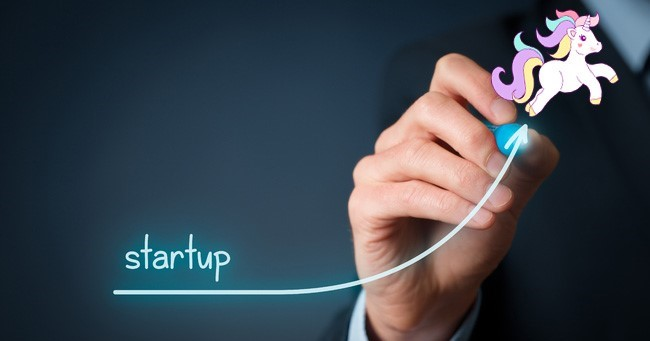

In [1]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ler os dados
Dados = pd.read_csv('unicorns_till_sep_2022.csv')

# Verificar Dimensão
Dados.shape

(1186, 7)

In [3]:
# Primeiros registros
Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
Dados = Dados.reset_index()

In [5]:
# Columnas
Dados.columns

Index(['index', 'Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Investors'],
      dtype='object')

In [6]:
# Renomear
Dados.rename( columns={
    'index' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Investors': 'Investidores',
}, inplace=True )

In [7]:
# Verificar Tipo do informação
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1186 non-null   int64 
 1   Empresa         1186 non-null   object
 2   Valor ($)       1186 non-null   object
 3   Data de Adesão  1186 non-null   object
 4   Pais            1186 non-null   object
 5   Cidade          1186 non-null   object
 6   Setor           1186 non-null   object
 7   Investidores    1168 non-null   object
dtypes: int64(1), object(7)
memory usage: 74.2+ KB


In [8]:
# Campos nulos
Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade             0
Setor              0
Investidores      18
dtype: int64

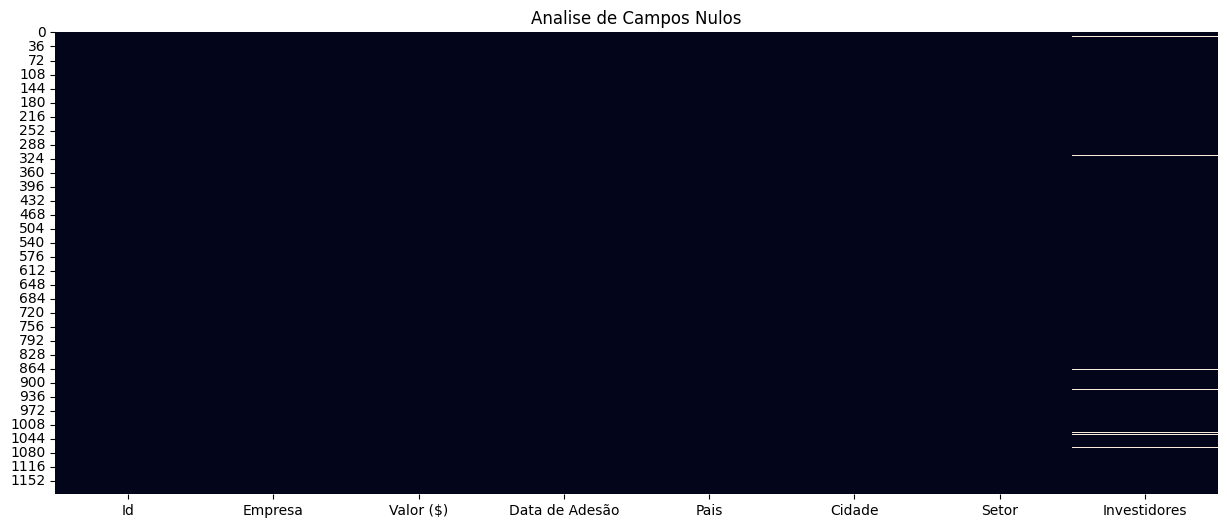

In [9]:
# Grafica
plt.figure( figsize=(15,6) )
plt.title('Analise de Campos Nulos')
sns.heatmap( Dados.isnull(), cbar=False );

In [10]:
# Campos unicos
Dados.nunique()

Id                1186
Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
Cidade             286
Setor               34
Investidores      1152
dtype: int64

In [11]:
# Valores Unicos
Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [12]:
# Valores Unicos - Rank
Dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [13]:
# Valores Unicos - Rank
Dados['Setor'].value_counts( normalize=True )

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

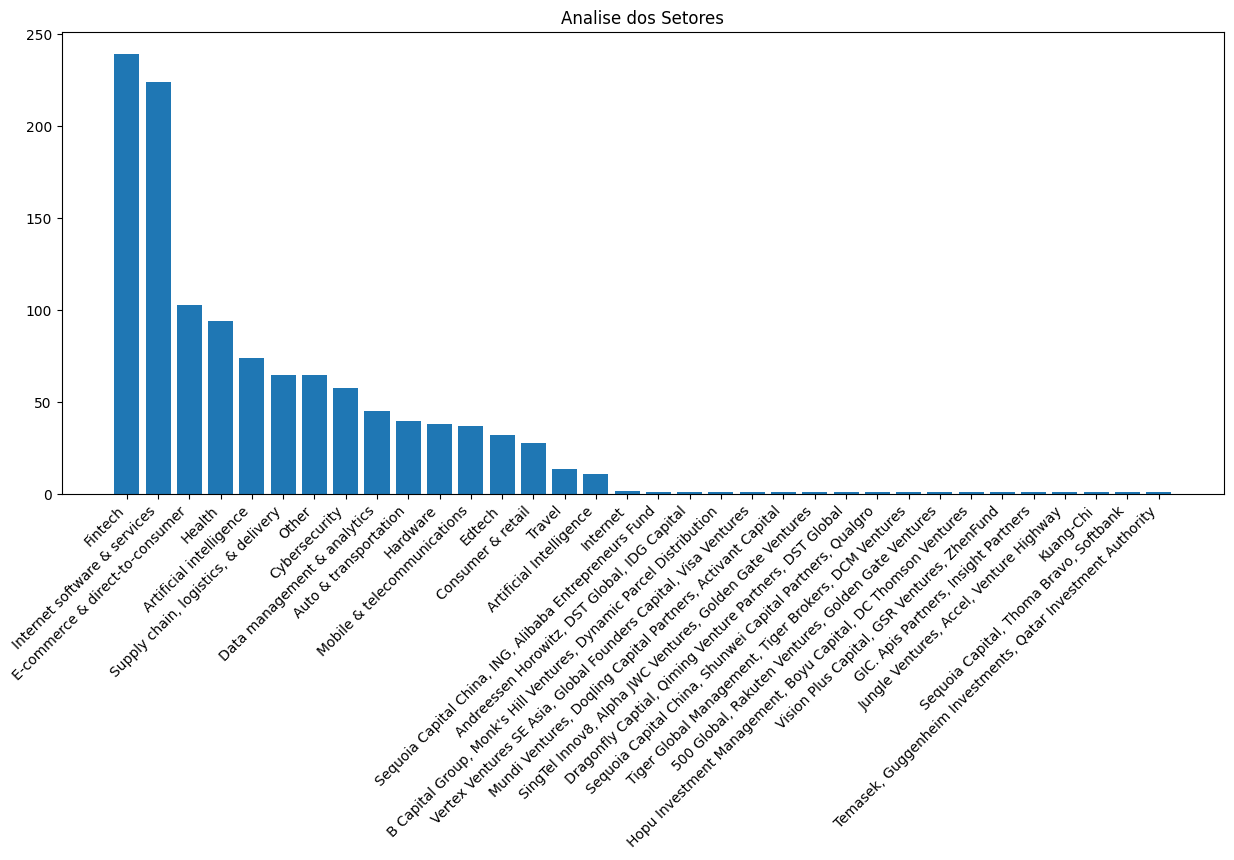

In [14]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( Dados['Setor'].value_counts().index, Dados['Setor'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [15]:
Analise = round( Dados['Pais'].value_counts( normalize=True ) * 100, 1 )

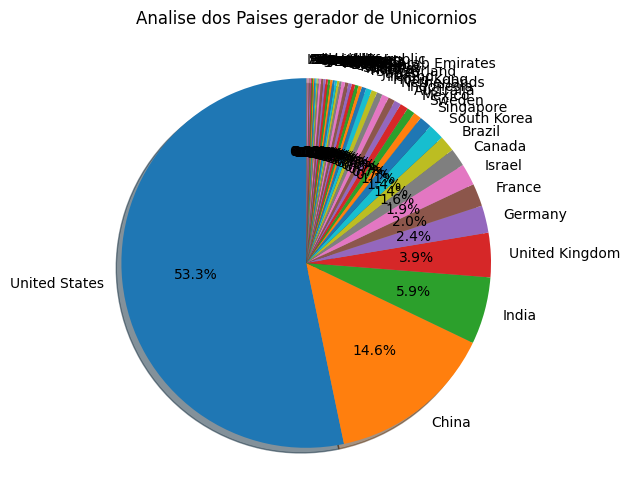

In [16]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

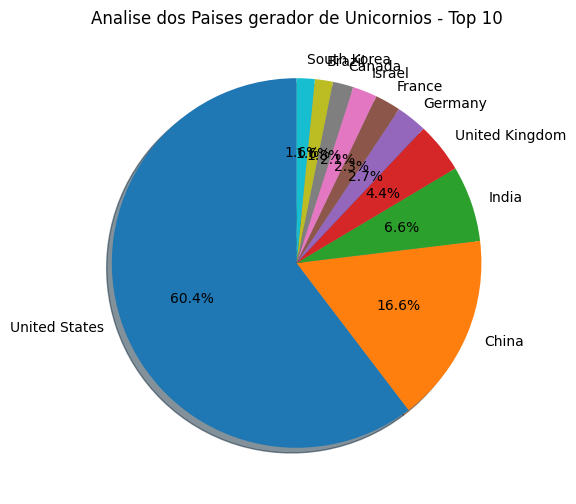

In [17]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios - Top 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [18]:
# Conversão para Data
Dados['Data de Adesão'] = pd.to_datetime( Dados['Data de Adesão'] )

Dados['Data de Adesão'].tail()

1181   2022-06-21
1182   2022-06-21
1183   2022-07-05
1184   2022-07-12
1185   2022-07-27
Name: Data de Adesão, dtype: datetime64[ns]

In [19]:
# Extrair o Ano e Mes
Dados['Mes'] = pd.DatetimeIndex( Dados['Data de Adesão'] ).month
Dados['Ano'] = pd.DatetimeIndex( Dados['Data de Adesão'] ).year

Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [20]:
# Tabela Analitica
Analise_Agrupada = Dados.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count()['Id']

Analise_Agrupada

Pais           Ano   Mes  Empresa          
Argentina      2021  8    Uala                 1
Australia      2018  1    Canva                1
               2019  3    Airwallex            1
               2021  5    SafetyCulture        1
                     7    Culture Amp          1
                                              ..
United States  2022  8    Flow                 1
                          Incredible Health    1
                          Orna Therapeutics    1
Vietnam        2021  10   Sky Mavis            1
                     12   MoMo                 1
Name: Id, Length: 1186, dtype: int64

In [ ]:
Analise_Agrupada.loc[
  Analise_Agrupada['Pais'] == 'Brazil'
]

In [ ]:
# Transformando a coluna Valor
Base_Dados['Valor ($)'] = pd.to_numeric( Base_Dados['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

Base_Dados.head()

In [ ]:
# Tabela Analitica
Analise_Pais = Base_Dados.groupby( by=['Pais'] ).sum()['Valor ($)'].reset_index()

Analise_Pais.head()

In [ ]:
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)
Analise_Valor.head()

In [ ]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_Valor['Pais'], Analise_Valor['Valor ($)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');